In [1]:
import sys
import heapq
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze
INF = float('inf')

## Bellman-Ford

In [2]:
def bellman_ford(maze, source, destination):
    x, y = source 
    distance = []
    parent = []
    
    for _ in range(maze.num_rows):
        distance.append([INF for i in range(maze.num_columns)])
        parent.append(list(bytearray(maze.num_columns)))
    
    distance[x][y] = 0
    
    for _ in range(4*maze.num_rows*maze.num_columns):
        for x in range(maze.num_rows):
            for y in range(maze.num_columns):
                if(x > 0):
                    if(maze.grid[x][y].neighbors["N"] != INF):
                        if(distance[x-1][y] > distance[x][y]+maze.grid[x][y].neighbors["N"]):
                            distance[x-1][y] = distance[x][y]+maze.grid[x][y].neighbors["N"]
                            parent[x-1][y] = (x,y)
                if(x < maze.num_rows-1):
                    if(maze.grid[x][y].neighbors["S"] != INF):
                        if(distance[x+1][y] > distance[x][y]+maze.grid[x][y].neighbors["S"]):
                            distance[x+1][y] = distance[x][y]+maze.grid[x][y].neighbors["S"]
                            parent[x+1][y] = (x,y)
                if(y < maze.num_columns-1):
                    if(maze.grid[x][y].neighbors["E"] != INF):
                        if(distance[x][y+1] > distance[x][y]+maze.grid[x][y].neighbors["E"]):
                            distance[x][y+1] = distance[x][y]+maze.grid[x][y].neighbors["E"]
                            parent[x][y+1] = (x,y)
                if(y > 0):
                    if(maze.grid[x][y].neighbors["W"] != INF):
                        if(distance[x][y-1] > distance[x][y]+maze.grid[x][y].neighbors["W"]):
                            distance[x][y-1] = distance[x][y]+maze.grid[x][y].neighbors["W"]
                            parent[x][y-1] = (x,y)
        
    for x in range(maze.num_rows):
        for y in range(maze.num_columns):
            if(x > 0):
                if(maze.grid[x][y].neighbors["N"] != INF):
                    if(distance[x-1][y] > distance[x][y]+maze.grid[x][y].neighbors["N"]):
                        return 0
            if(x < maze.num_rows-1):
                if(maze.grid[x][y].neighbors["S"] != INF):
                    if(distance[x+1][y] > distance[x][y]+maze.grid[x][y].neighbors["S"]):
                        return 1
            if(y < maze.num_columns-1):
                if(maze.grid[x][y].neighbors["E"] != INF):
                    if(distance[x][y+1] > distance[x][y]+maze.grid[x][y].neighbors["E"]):
                        return 2
            if(y > 0):
                if(maze.grid[x][y].neighbors["W"] != INF):
                    if(distance[x][y-1] > distance[x][y]+maze.grid[x][y].neighbors["W"]):
                        return 3
    
    for x in range(maze.num_rows):
        for y in (0, maze.num_columns-1):
            if((x,y) == destination):
                out = [(x,y)]
                while(parent[x][y] != 0):
                    x, y = parent[x][y]
                    out.append((x,y))
                return out[::-1]
    
    return []

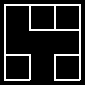

In [3]:
maze = Maze(3,3)
maze.add_path((0,0), "S", 0)
maze.add_path((0,1), "E", 0)
maze.add_path((1,1), "S", 0)
maze.add_path((1,1), "E", 0)
maze.add_path((1,2), "S", 0)
display(maze.draw(cell_width = 25))

In [4]:
bellman_ford(maze, (0,0), (1,2))

[(0, 0), (1, 0), (1, 1), (1, 2)]

[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 8), (7, 8), (7, 9), (7, 10), (8, 10), (9, 10), (9, 11), (9, 12), (10, 12), (11, 12), (11, 13), (11, 14), (12, 14), (13, 14), (13, 15), (14, 15), (15, 15)]


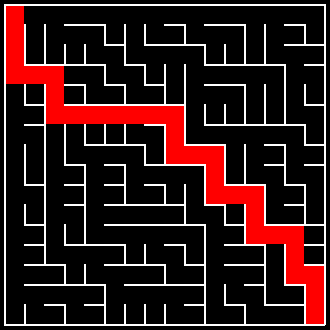

In [7]:
maze = Maze()
maze.load("BinaryTree_16x16.maze")
path = bellman_ford(maze, (0,0), (15,15))
print(path)
maze.add_colors(path = path)
display(maze.draw(cell_width=20))

## Proof of Correctness

Proof by induction:
<br>
Lemma- After `i` iterations of the for loop:
+ if Distance(u) is not infinity, it is equal to the length of some path from s to u; and
+ if there is a path from s to u with at most i edges,

then Distance(u) is at most the length of the shortest path from `s` to `u` with at most `i` edges.

Proof:- For the base case of induction, consider `i=0` and the moment before for loop is executed for the first time. Then, for the source vertex, `source.distance = 0`, which is correct. For other vertices `u`, `u.distance = infinity`, which is also correct because there is no path from source to `u` with 0 edges.

For the inductive case, we first prove the first part. Consider a moment when a vertex's distance is updated by `v.distance := u.distance + uv.weight`. By inductive assumption, `u.distance` is the length of some path from source to `u`. Then `u.distance + uv.weight` is the length of the path from source to `v` that follows the path from source to `u` and then goes to `v`.

For the second part, consider a shortest path P (there may be more than one) from source to `v` with at most i edges. Let `u` be the last vertex before `v` on this path. Then, the part of the path from source to `u` is a shortest path from source to `u` with at most `i-1` edges, since if it were not, then there must be some strictly shorter path from source to `u` with at most `i-1` edges, and we could then append the edge `uv` to this path to obtain a path with at most `i` edges that is strictly shorter than `P—a` contradiction. By inductive assumption, `u.distance` after `i−1` iterations is at most the length of this path from source to `u`. Therefore, `uv.weight + u.distance` is at most the length of P. In the ith iteration, `v.distance` gets compared with `uv.weight + u.distance`, and is set equal to it if `uv.weight + u.distance` is smaller. Therefore, after `i` iterations, `v.distance` is at most the length of P, i.e., the length of the shortest path from source to `v` that uses at most `i` edges.

If there are no negative-weight cycles, then every shortest path visits each vertex at most once, so at step 3 no further improvements can be made. Conversely, suppose no improvement can be made. Then for any cycle with vertices `v[0], ..., v[k−1]`,<br>
`v[i].distance <= v[(i-1) (mod k)].distance + v[(i-1) (mod k)]v[i].weight`

Summing around the cycle, the `v[i].distance` and `v[i−1 (mod k)].distance` terms cancel, leaving

`0 <= sum from 1 to k of v[i-1 (mod k)]v[i].weight`

I.e., every cycle has nonnegative weight.